## CREDIT CARD FRAUD DETECTION:

---
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


### LIBRARIES AND MODULES

---



In [1]:
# Libraries
import numpy as np
import pandas as  pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Modules
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

### DATA

---
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [3]:
data=pd.read_csv('D:/DOWNLOADS/creditcard.csv')
data.dropna()
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### COUNT OF FRAUD AND SAFE TRANSACTIONS

---



In [4]:
f = data[data['Class'] == 1] # fraud
s = data[data['Class'] == 0] # safe
print('The number of fraud transactions are : {}'.format(f.shape[0]))
print('The number of safe transactions are : {}'.format(s.shape[0]))

The number of fraud transactions are : 492
The number of safe transactions are : 284315


### DONUT CHART SHOWING DISTRIBUTION OF FRAUD AND SAFE TRANSACTIONS

---



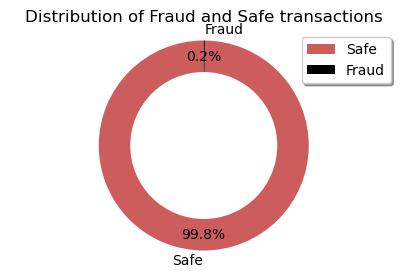

In [5]:
# Count the number of fraud and safe transactions
m = data['Class'].value_counts()

# Create a donut chart
labels = [ 'Safe','Fraud']
sizes = m.values
colors = ['indianred', 'black']
explode = (0, 0)  # To make the first slice (fraud) explode out

fig1, ax1 = plt.subplots(figsize=(5,3))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a white circle in the center to create the donut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax1.axis('equal')
plt.legend(loc='best',shadow=True)
plt.title('Distribution of Fraud and Safe transactions')
plt.show()

### TRAIN TEST SPLIT

---



In [6]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

### STANDARIZATION OF THE VARIABLES

---



In [7]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###  TERMINOLOGIES

---


*   **ACCURACY SCORE:** The base metric used for model evaluation is often Accuracy, describing the number of correct predictions over all predictions.
*    **PRECISION SCORE:** Precision is a measure of how many of the positive predictions made are correct (true positives).


*   **RECALL SCORE:** Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. This is also called 'Sensitivity'.
*   **F1 SCORE:** F1-Score is a measure combining both precision and recall.







### 1.   LOGISTIC REGRESSION

---





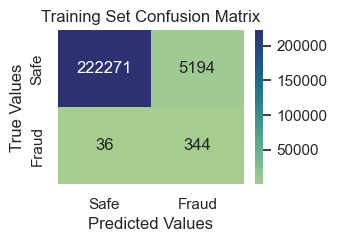

Confusion Matrix (Testing Set):


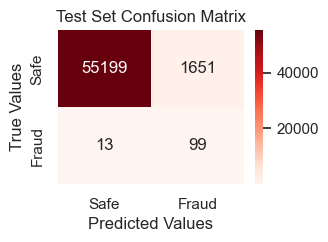

In [9]:
# Fitting the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
pred_tr = model.predict_proba(X_train)[:, 1]  # Probability of positive class (class01 = 1)

# Calculate ROC-AUC score for training set
ROC_logistic= roc_auc_score(y_train, pred_tr)

# Find the threshold corresponding to the highest specificity * sensitivity (co = sensitivity * specificity)
thresholds = model.decision_function(X_train)
fpr, tpr, threshold = roc_curve(y_train, pred_tr)
co = tpr * (1 - fpr)
cutoff = threshold[co.argmax()]

# Make predictions on the training set using the chosen threshold
pred_val = (pred_tr > cutoff).astype(int)

# Confusion matrix for the training set
CM=confusion_matrix(y_train, pred_val)
class_labels = ['Safe', 'Fraud']
sns.heatmap(CM, annot=True, fmt='d', cmap="crest", xticklabels=class_labels, yticklabels=class_labels)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Training Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Accuracy of  training model
train_accuracy_logistic = accuracy_score(y_train, pred_val)
train_precision_logistic = precision_score(y_train, pred_val)
train_recall_logistic = recall_score(y_train, pred_val)
train_f1_score_logistic = f1_score(y_train, pred_val)

# Make predictions on the testing set
pred_ts = model.predict_proba(X_test)[:, 1]

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
fpr_ts, tpr_ts, threshold_ts = roc_curve(y_test, pred_ts)
co_ts = tpr_ts * (1 - fpr_ts)
cutoff_ts = threshold_ts[co_ts.argmax()]

# Make predictions on the testing set using the chosen threshold
pred_val_ts = (pred_ts > cutoff_ts).astype(int)

# Confusion matrix for the testing set
print("Confusion Matrix (Testing Set):")
CM=confusion_matrix(y_test, pred_val_ts)
class_labels = ['Safe', 'Fraud']
sns.heatmap(CM, annot=True, fmt='d', cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Test Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.show()

# Accuracy of model
test_accuracy_logistic = accuracy_score(y_test, pred_val_ts)
test_precision_logistic = precision_score(y_test, pred_val_ts)
test_recall_logistic = recall_score(y_test, pred_val_ts)
test_f1_score_logistic = f1_score(y_test, pred_val_ts)

d={'Accuracy Score':[train_accuracy_logistic,test_accuracy_logistic],'Precision Score':[train_precision_logistic,test_precision_logistic],
  'Recall Score':[train_recall_logistic,test_recall_logistic],'f1 Score':[train_f1_score_logistic,test_f1_score_logistic]}
df=pd.DataFrame(d)
df.index=['Train','Test']

### 2. RANDOM FOREST CLASSIFIER

---



In [ ]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the training set
pred_tr_rf = rf_model.predict_proba(X_train)[:, 1]  # Probability of positive class (class01 = 1)

# Calculate ROC-AUC score for training set
ROC_random_forest = roc_auc_score(y_train, pred_tr_rf)

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
thresholds_rf = rf_model.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_train, pred_tr_rf)
co_rf = tpr_rf * (1 - fpr_rf)
cutoff_rf = threshold_rf[co_rf.argmax()]

# Make predictions on the training set using the chosen threshold
pred_val_rf = (pred_tr_rf > cutoff_rf).astype(int)

# Confusion matrix for the training set
CM_rf = confusion_matrix(y_train, pred_val_rf)
class_labels_rf = ['Safe', 'Fraud']
sns.heatmap(CM_rf, annot=True, fmt='d', cmap="crest", xticklabels=class_labels_rf, yticklabels=class_labels_rf)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Random Forest Training Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels_rf)) + 0.5, class_labels_rf)
plt.yticks(np.arange(len(class_labels_rf)) + 0.5, class_labels_rf)
plt.show()

# Accuracy of the Random Forest training model
train_accuracy_rf = accuracy_score(y_train, pred_val_rf)
train_precision_rf = precision_score(y_train, pred_val_rf)
train_recall_rf = recall_score(y_train, pred_val_rf)
train_f1_score_rf = f1_score(y_train, pred_val_rf)

# Make predictions on the testing set
pred_ts_rf = rf_model.predict_proba(X_test)[:, 1]

# Find the threshold corresponding to the highest sensitivity * specificity (co = sensitivity * specificity)
fpr_ts_rf, tpr_ts_rf, threshold_ts_rf = roc_curve(y_test, pred_ts_rf)
co_ts_rf = tpr_ts_rf * (1 - fpr_ts_rf)
cutoff_ts_rf = threshold_ts_rf[co_ts_rf.argmax()]

# Make predictions on the testing set using the chosen threshold
pred_val_ts_rf = (pred_ts_rf > cutoff_ts_rf).astype(int)

# Confusion matrix for the testing set
print("Random Forest Confusion Matrix (Testing Set):")
CM_rf_ts = confusion_matrix(y_test, pred_val_ts_rf)
class_labels_rf_ts = ['Safe', 'Fraud']
sns.heatmap(CM_rf_ts, annot=True, fmt='d', cmap="Reds", xticklabels=class_labels_rf_ts, yticklabels=class_labels_rf_ts)
sns.set(rc={'figure.figsize':(3,2)})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Random Forest Test Set Confusion Matrix')
plt.xticks(np.arange(len(class_labels_rf_ts)) + 0.5, class_labels_rf_ts)
plt.yticks(np.arange(len(class_labels_rf_ts)) + 0.5, class_labels_rf_ts)
plt.show()

# Accuracy of the Random Forest model
test_accuracy_rf = accuracy_score(y_test, pred_val_ts_rf)
test_precision_rf = precision_score(y_test, pred_val_ts_rf)
test_recall_rf = recall_score(y_test, pred_val_ts_rf)
test_f1_score_rf = f1_score(y_test, pred_val_ts_rf)

# Create a DataFrame to compare performance metrics for both models
d_rf = {'Accuracy Score': [train_accuracy_rf, test_accuracy_rf],
        'Precision Score': [train_precision_rf, test_precision_rf],
        'Recall Score': [train_recall_rf, test_recall_rf],
        'f1 Score': [train_f1_score_rf, test_f1_score_rf]}
df_rf = pd.DataFrame(d_rf)
df_rf.index = ['Train', 'Test']

### COMPARISON GOODNESS OF FIT OF THE MODELS

---



In [ ]:
# Display the performance metrics for both models
print("Logistic Regression Performance:")
print(df)
print("\nRandom Forest Performance:")
print(df_rf)

### COMPARING ROC CURVE AND AUC

---



In [ ]:
# Plot ROC curves
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="best")
plt.show()

d={'Logistic AUC Score':[ROC_logistic],'Random Forest AUC Score':[ROC_random_forest]}
pd.DataFrame(d)